In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# The Data
Let's start by reading in the insurance.csv file into a pandas dataframe.

In [4]:
#reading csv
df=medical=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
#head values
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
#shape of dataset
medical.shape

(1338, 7)

In [31]:
#getting some information about the dataset
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# categorical features: 
1.sex 
2.region
3.smoker

# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [12]:
#checking for null value
medical.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [13]:
#sum of null value
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

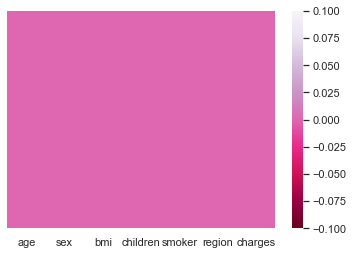

In [47]:
#heatmap for null values is present or not
sns.heatmap(medical.isnull(),yticklabels=False,cbar=True,cmap='PuRd_r')

there is no null values is present in our dataset

<AxesSubplot:xlabel='smoker', ylabel='count'>

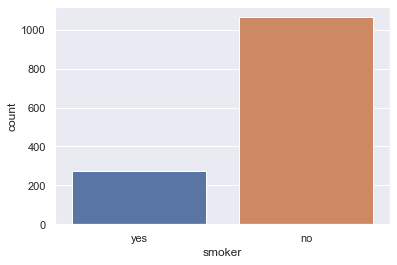

In [48]:
#sns plot for smoker
sns.countplot(x='smoker',data=medical)

In [59]:
medical["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

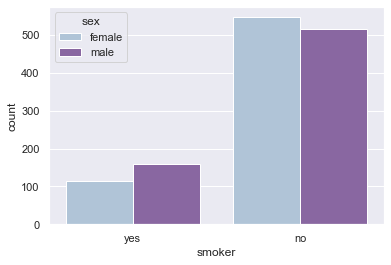

In [49]:
#sns plot for smoker and sex
sns.countplot(x='smoker',hue='sex',data=train,palette='BuPu')

<AxesSubplot:xlabel='smoker', ylabel='count'>

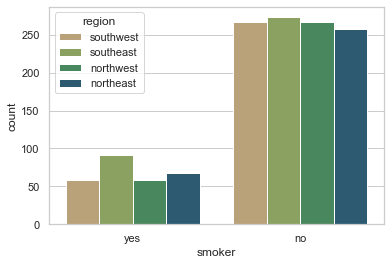

In [50]:
#sns plot for smoker in each regions
sns.set_style('whitegrid')
sns.countplot(x='smoker',hue='region',data=train,palette='gist_earth_r')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

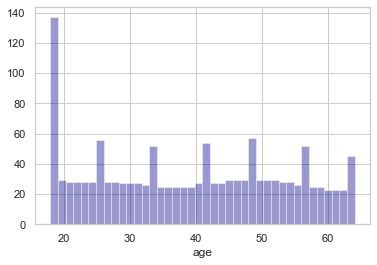

In [51]:
#dist plot for age
sns.distplot(medical['age'].dropna(),kde=False,color='darkblue',bins=40)  # Kernel Density Estimation

<AxesSubplot:>

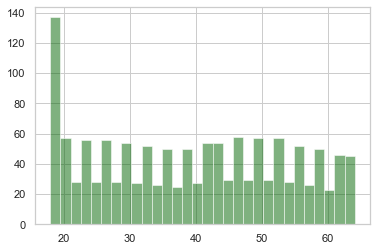

In [52]:

medical['age'].hist(bins=30,color='darkgreen',alpha=0.5)

<AxesSubplot:>

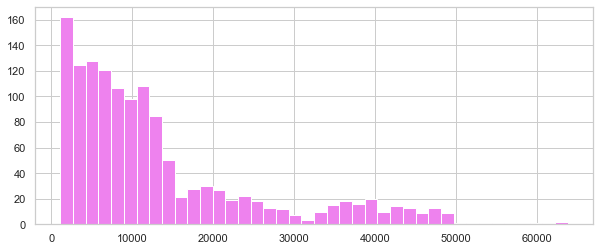

In [54]:
#plot for charges
medical['charges'].hist(color='violet',bins=40,figsize=(10,4))

# Data Analysis

In [32]:
#statistical measures of the dataset
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 432x432 with 0 Axes>

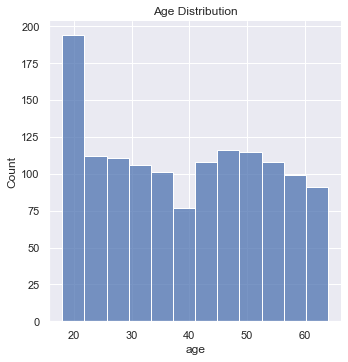

In [41]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(medical["age"])
plt.title("Age Distribution")
plt.show()

Text(0.5, 1.0, 'Sex distribution')

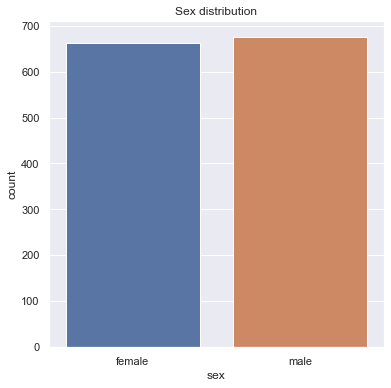

In [44]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=medical)
plt.title("Sex distribution")

In [45]:
medical["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 432x432 with 0 Axes>

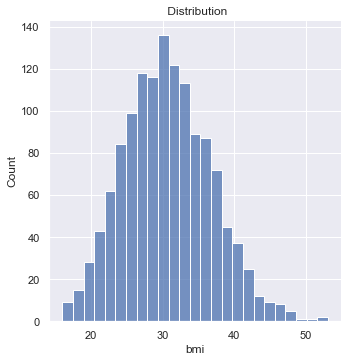

In [46]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(medical["bmi"])
plt.title(" Distribution")
plt.show()

normal BMI range-> 18.5 to 24.9

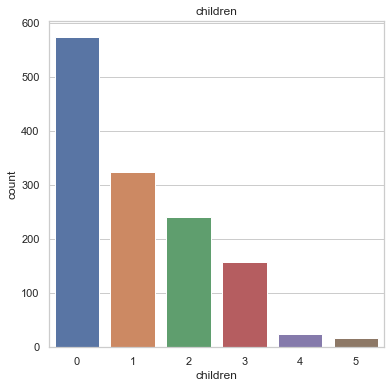

In [55]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x="children", data=medical)
plt.title("children")
plt.show()

In [57]:
medical["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

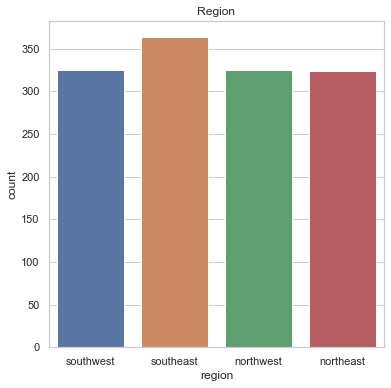

In [60]:
#Region column
plt.figure(figsize=(6,6))
sns.countplot(x="region", data=medical)
plt.title("Region")
plt.show()

In [61]:
medical["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


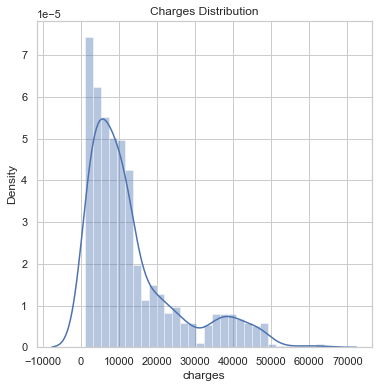

In [63]:
#distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(medical["charges"])
plt.title("Charges Distribution")
plt.show()

# Data preprocessing

# Encoding the categorical features

In [5]:
#encoding sex column
medical.replace({'sex':{'male':0, 'female':1}},inplace=True)

In [6]:
#encoding "smoker column"
medical.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [11]:
#encoding "region" column
medical.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

# splitting the features and target

In [13]:
x= medical.drop(columns='charges',axis=1)
y=medical['charges']

In [14]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [15]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# splitting the data into Training data & Testing data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [20]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training

# Linear Regression